# Exploración de Datos (EDA)

## Introducción

El análisis exploratorio de datos (EDA) es una fase crucial en el proceso de cualquier proyecto de análisis de datos o aprendizaje automático. A través del EDA, podemos obtener una comprensión profunda de los datos, identificar patrones y relaciones significativas, y detectar posibles anomalías o inconsistencias que podrían afectar la calidad del análisis posterior. En este notebook, realizaremos un EDA exhaustivo de un conjunto de datos de imágenes de radiografías de rodillas, con el objetivo de preparar los datos para el modelado y análisis detallado.

## Propósito

El propósito de este EDA es examinar las características fundamentales de las imágenes de radiografías de rodillas, identificar cualquier problema de calidad y consistencia, y extraer información valiosa que pueda guiar el proceso de modelado de aprendizaje automático. Específicamente, buscamos:

1. Evaluar las estadísticas básicas y distribuciones de los valores de píxeles.
2. Analizar características de textura, bordes, contornos y forma en las imágenes.
3. Detectar y manejar artefactos, ruido y anomalías en las imágenes.
4. Verificar la consistencia y calidad de los datos.

## Metodología

Las siguientes tareas serán realizadas como parte de la exploración de datos:

El EDA se llevará a cabo siguiendo una serie de pasos estructurados:

1. **Carga de datos:** Importar las imágenes y organizarlas por categorías.
2. **Estadísticas Básicas de las Imágenes:** Calcular estadísticas descriptivas de las imágenes.
3. **Distribución de Intensidades de los Píxeles:** Examinar la distribución de los valores de píxeles en las imágenes.
4. **Distribución de la Intensidad Media de los Píxeles por Categoría:** Analizar la intensidad media de los píxeles en cada categoría.
5. **Análisis de Correlación entre la Intensidad Media de los Píxeles y las Categorías:** Evaluar la correlación entre la intensidad media de los píxeles y las categorías.
6. **Análisis de la Distribución del Ruido en las Imágenes:** Medir y visualizar la cantidad de ruido en las imágenes.
7. **Análisis de Textura:** Calcular y visualizar características de textura utilizando la matriz de co-ocurrencia de niveles de gris (GLCM).
8. **Análisis ANOVA para Características de Textura:** Realizar análisis ANOVA para comparar características de textura entre categorías.
9. **Análisis de Bordes y Contornos:** Detectar bordes y contornos en las imágenes y analizar su distribución.
10. **Análisis de Forma:** Calcular características de forma como área, excentricidad, extensión y solidez.
11. **Distribución de Artefactos y Ruido:** Identificar y medir artefactos y ruido en las imágenes.
12. **Verificación de Consistencia y Calidad de los Datos:** Revisar la consistencia y calidad de los datos procesados.
13. **Detección de Anomalías:** Aplicar métodos de detección de anomalías para identificar imágenes atípicas.
14. **Eliminación y Clasificación de Imágenes Anómalas:** Eliminar y clasificar las imágenes identificadas como anómalas.

## Resultados Esperados

Al completar este EDA, esperamos obtener una visión clara de la calidad y características de las imágenes de radiografías de rodillas. Anticipamos identificar y manejar cualquier problema de consistencia, artefactos, ruido o anomalías en las imágenes. Los resultados proporcionarán una base sólida para el siguiente paso en el proceso de análisis, que incluye el desarrollo de modelos de aprendizaje automático para la detección y clasificación de artritis de rodilla.

Además, los análisis de textura, bordes, contornos y forma nos proporcionarán características valiosas que pueden ser utilizadas para el entrenamiento de modelos predictivos. La verificación de la calidad de los datos garantizará que los modelos se construyan sobre una base de datos robusta y confiable.

Con estos pasos, estaremos bien preparados para avanzar hacia el desarrollo de modelos de machine learning precisos y efectivos para el diagnóstico de la artritis de rodilla.

A continuación, comenzamos con la carga y la inspección inicial de los datos.

### Carga de datos

La primera tarea consiste en cargar el conjunto de datos en el entorno de trabajo. Esto implica leer las imágenes desde el directorio donde se encuentran almacenadas y almacenarlas en un DataFrame para facilitar el análisis posterior.

In [1]:
# Carga de datos
import os
import cv2
import pandas as pd
import numpy as np
from IPython.display import display, HTML

# Definir las rutas correctamente basadas en la ubicación del notebook
base_path = os.path.abspath('')
data_path = os.path.join(base_path, 'data', 'processed', 'images')

# Función para cargar las imágenes en un dataframe
def load_images(data_path):
    image_data = []
    for category in ['normal', 'doubtful', 'mild', 'moderate', 'severe']:
        category_path = os.path.join(data_path, category)
        for filename in os.listdir(category_path):
            file_path = os.path.join(category_path, filename)
            if filename.lower().endswith(('png', 'jpg', 'jpeg')):  # Verificar si el archivo es una imagen
                image = cv2.imread(file_path)
                image_data.append((category, filename, image))
    return pd.DataFrame(image_data, columns=['category', 'filename', 'image'])

# Cargar las imágenes en un dataframe
image_df = load_images(data_path)

# Inspección inicial del dataframe
display(image_df.head())
display(image_df.info())

# Contar el número de imágenes por categoría
category_counts = image_df['category'].value_counts()
print("Número de imágenes por categoría:")
display(category_counts)

,category,filename,image
0,normal,NormalG0 (1).png,"[[[115, 115, 115], [115, 115, 115], [115, 115,..."
1,normal,NormalG0 (10).png,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,normal,NormalG0 (100).png,"[[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ..."
3,normal,NormalG0 (101).png,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4,normal,NormalG0 (102).png,"[[[98, 98, 98], [102, 102, 102], [103, 103, 10..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2542 non-null   object
 1   filename  2542 non-null   object
 2   image     2542 non-null   object
dtypes: object(3)
memory usage: 59.7+ KB


None

Número de imágenes por categoría:


category
normal      538
doubtful    504
mild        500
moderate    500
severe      500
Name: count, dtype: int64

**Inspección Inicial del DataFrame:**

* El DataFrame contiene tres columnas: `category`, `filename` e `image`.
* La columna `category` indica la categoría de la imagen (normal, doubtful, mild, moderate, severe).
* La columna `filename` muestra el nombre del archivo de la imagen.
* La columna `image` contiene los datos de la imagen en formato de matriz.
  
**Información del DataFrame:**

* El DataFrame tiene **2542** entradas.
* No hay valores nulos en ninguna de las columnas.

**Conteo por Categoría:**

* `normal`: 538 imágenes
* `doubtful`: 504 imágenes
* `mild`: 500 imágenes
* `moderate`: 500 imágenes
* `severe`: 500 imágenes

### Estadísticas Básicas de las Imágenes

En esta tarea, vamos a calcular y visualizar estadísticas básicas de las imágenes, como la distribución de las dimensiones (altura y anchura) y la intensidad de los píxeles.

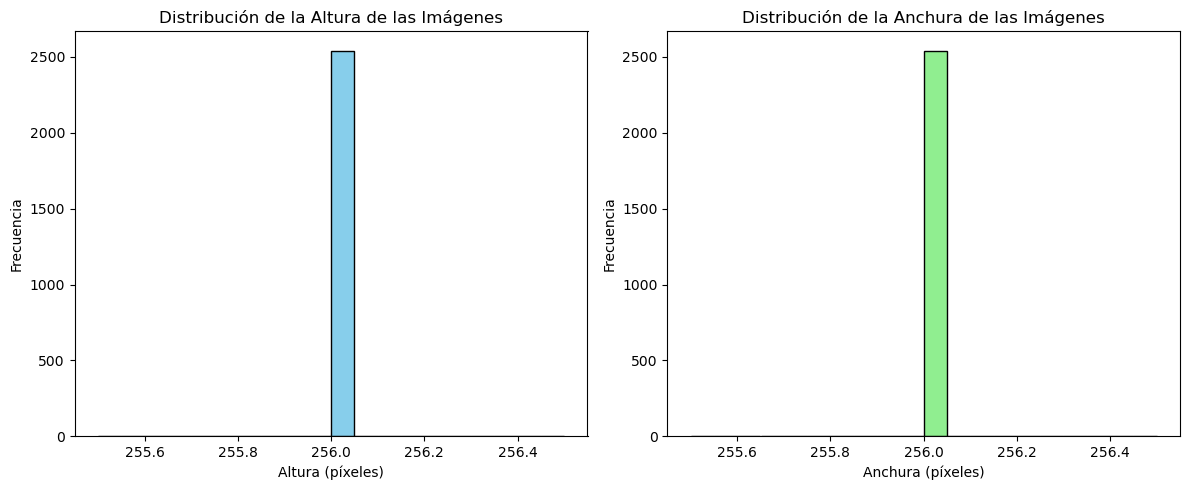

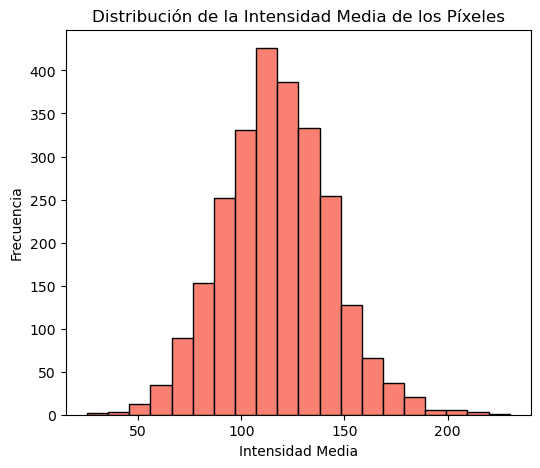

In [2]:
import matplotlib.pyplot as plt

# Función para calcular estadísticas básicas
def calculate_basic_statistics(image_df):
    dimensions = image_df['image'].apply(lambda x: (x.shape[0], x.shape[1]))
    intensities = image_df['image'].apply(lambda x: x.mean())
    
    # Agregar estadísticas al DataFrame
    image_df['height'] = dimensions.apply(lambda x: x[0])
    image_df['width'] = dimensions.apply(lambda x: x[1])
    image_df['mean_intensity'] = intensities
    
    return image_df

# Calcular estadísticas básicas
image_df = calculate_basic_statistics(image_df)

# Visualizar distribución de dimensiones
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(image_df['height'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de la Altura de las Imágenes')
plt.xlabel('Altura (píxeles)')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.hist(image_df['width'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribución de la Anchura de las Imágenes')
plt.xlabel('Anchura (píxeles)')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Visualizar distribución de la intensidad de los píxeles
plt.figure(figsize=(6, 5))
plt.hist(image_df['mean_intensity'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribución de la Intensidad Media de los Píxeles')
plt.xlabel('Intensidad Media')
plt.ylabel('Frecuencia')
plt.show()

**Distribución de la Altura de las Imágenes:**

* Todas las imágenes tienen una **altura** de `256 píxeles`.
* Esto indica que las imágenes han sido redimensionadas uniformemente durante el preprocesamiento.
  
**Distribución de la Anchura de las Imágenes:**

* Similar a la altura, todas las imágenes tienen una **anchura** de `256 píxeles`.
* Esto también confirma que las imágenes han sido redimensionadas uniformemente.
  
**Distribución de la Intensidad Media de los Píxeles:**

* La intensidad media de los píxeles está distribuida aproximadamente en forma de campana, con una **media** alrededor de `100-150`.
* Esto sugiere que la mayoría de las imágenes tienen un rango de intensidad similar, lo que es típico en imágenes de rayos X donde los valores de intensidad representan diferentes niveles de densidad en las áreas de la rodilla.

### Distribución de Intensidades de los Píxeles

En esta tarea, vamos a analizar más a fondo la distribución de los valores de intensidad de los píxeles en las imágenes, tanto a nivel general como por categoría.

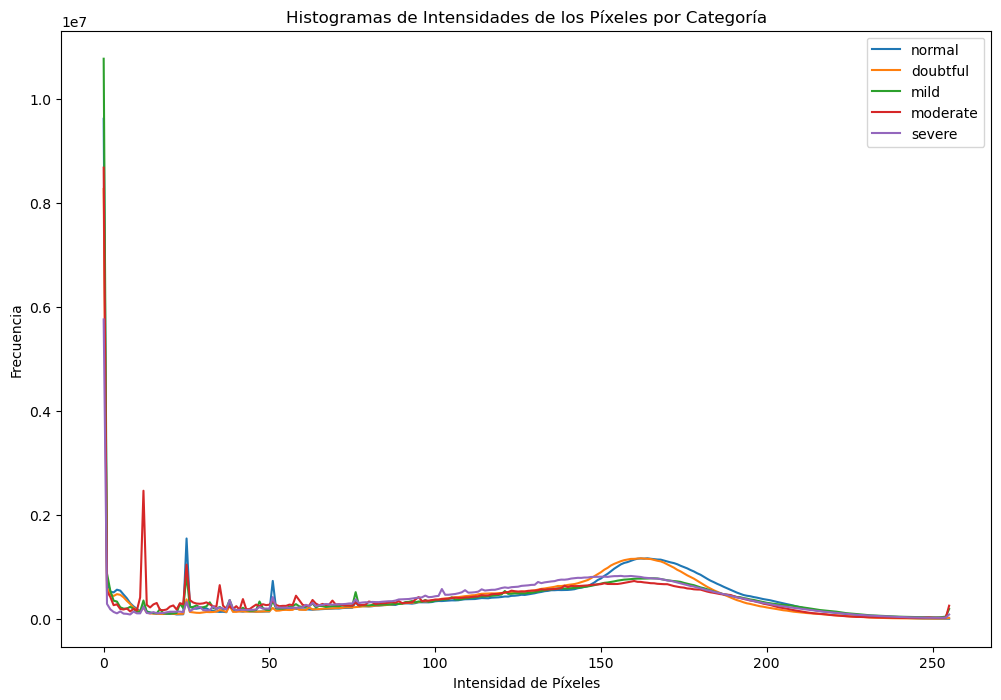

In [3]:
# Función para calcular el histograma de intensidades de píxeles
def calculate_pixel_intensity_histogram(image_df):
    histograms = {}
    for category in image_df['category'].unique():
        category_images = np.concatenate(image_df[image_df['category'] == category]['image'].values)
        histogram, bin_edges = np.histogram(category_images, bins=256, range=(0, 256))
        histograms[category] = (histogram, bin_edges)
    return histograms

# Calcular histogramas de intensidades por categoría
pixel_intensity_histograms = calculate_pixel_intensity_histogram(image_df)

# Visualizar histogramas de intensidades por categoría
plt.figure(figsize=(12, 8))

for category, (histogram, bin_edges) in pixel_intensity_histograms.items():
    plt.plot(bin_edges[0:-1], histogram, label=category)

plt.title('Histogramas de Intensidades de los Píxeles por Categoría')
plt.xlabel('Intensidad de Píxeles')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right')
plt.show()

El histograma muestra la distribución de las intensidades de los píxeles para cada categoría de imágenes. Algunas observaciones clave son:

* **Pico Inicial:** Todas las categorías muestran un pico significativo en la intensidad de píxeles cercana a 0, lo que sugiere que una gran parte de las imágenes tienen áreas oscuras o fondo negro. También indica que las imágenes fueron capturadas en condiciones similares, con fondos oscuros que son consistentes a lo largo de todas las categorías. Puede ser necesario aplicar técnicas de preprocesamiento adicionales, como segmentación o eliminación de fondo, para enfocarse en las áreas relevantes de las imágenes.
  
* **Distribución Similar:** Aunque hay algunas variaciones, las distribuciones de las intensidades de píxeles son bastante similares entre las categorías. Esto puede indicar que las diferencias en la intensidad de los píxeles no son lo suficientemente pronunciadas como para distinguir claramente entre las categorías. Una distribución similar de intensidades de píxeles sugiere que las imágenes en todas las categorías tienen características visuales similares en términos de brillo y contraste. Esto puede ser útil si estamos buscando mantener consistencia en las condiciones de captura de las imágenes.  Puede ser necesario extraer características más avanzadas, como texturas, formas o características basadas en el dominio del problema, para mejorar la capacidad del modelo de diferenciar entre las categorías.

### Distribución de la Intensidad Media de los Píxeles por Categoría

En esta tarea, analizaremos la distribución de la intensidad media de los píxeles por categoría. Esto nos permitirá identificar posibles diferencias en la intensidad promedio entre las diferentes categorías de imágenes, lo cual puede ser útil para el posterior desarrollo de modelos de aprendizaje automático.

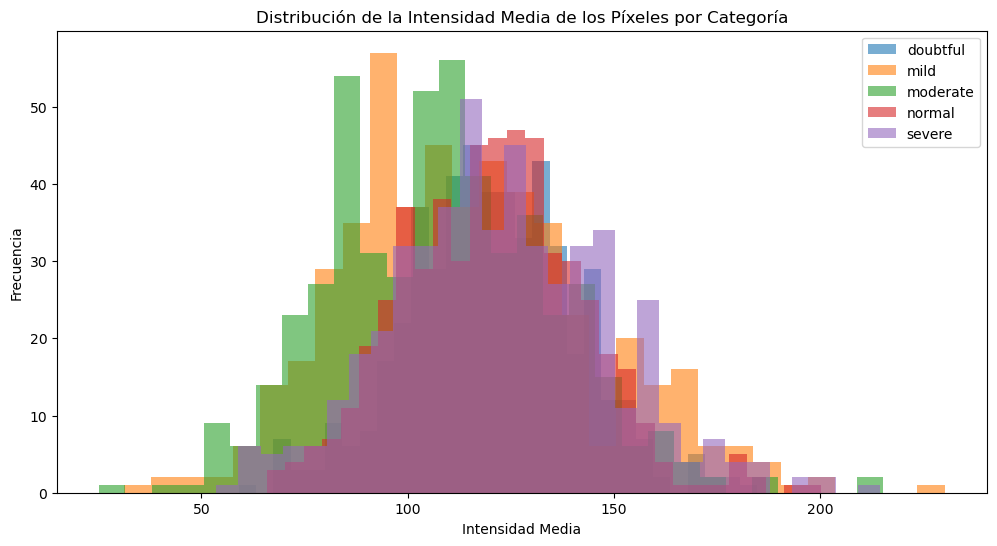

In [4]:
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt

# Definir las rutas correctamente basadas en la ubicación del notebook
base_path = os.path.abspath('')
data_path = os.path.join(base_path, 'data', 'processed', 'images')

# Crear una lista para almacenar las intensidades medias
intensity_data = []

# Recorrer las imágenes en cada categoría
for category in os.listdir(data_path):
    category_path = os.path.join(data_path, category)
    for filename in os.listdir(category_path):
        file_path = os.path.join(category_path, filename)
        if filename.lower().endswith(('png', 'jpg', 'jpeg')):
            image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            mean_intensity = image.mean()
            intensity_data.append((category, filename, mean_intensity))

# Crear un DataFrame con los datos de intensidad
intensity_df = pd.DataFrame(intensity_data, columns=['category', 'filename', 'mean_intensity'])

# Graficar la distribución de la intensidad media por categoría
plt.figure(figsize=(12, 6))
for category in intensity_df['category'].unique():
    category_data = intensity_df[intensity_df['category'] == category]
    plt.hist(category_data['mean_intensity'], bins=30, alpha=0.6, label=category)

plt.title('Distribución de la Intensidad Media de los Píxeles por Categoría')
plt.xlabel('Intensidad Media')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

La distribución de la intensidad media de los píxeles por categoría en la gráfica muestra que, en general, las categorías tienen distribuciones bastante similares, lo que indica que las imágenes tienen un brillo promedio similar. Aquí hay algunos puntos importantes sobre la interpretación de este gráfico:

1. **Distribución General:** La mayoría de las imágenes tienen una **intensidad media** de píxeles `entre 75 y 150`. Esto indica que la mayoría de las imágenes tienen un brillo moderado. Las imágenes están bien distribuidas en cuanto a la intensidad media de los píxeles, lo cual sugiere que no hay imágenes extremadamente oscuras ni extremadamente brillantes en grandes cantidades.
2. **Superposición de Categorías:** Las categorías `doubtful`, `mild`, `moderate`, `normal` y `severe` se superponen significativamente, lo que sugiere que, en términos de brillo promedio, las imágenes no son significativamente diferentes entre las categorías. Esto podría significar que la intensidad media de los píxeles por sí sola puede no ser un buen discriminador entre las diferentes categorías de artritis.
3. **Variabilidad:** La categoría `severe` tiene una distribución que parece desplazarse hacia la derecha, indicando que hay más imágenes en esta categoría con una intensidad media de píxeles mayor. Las categorías `mild` y `moderate` muestran picos pronunciados en ciertos rangos de intensidad, lo que sugiere una cierta uniformidad en la intensidad de las imágenes dentro de estas categorías.
4. **Picos en la Distribución:** Los picos en la distribución indican que hay ciertos valores de intensidad media que son más comunes. Esto podría estar relacionado con cómo se adquirieron las imágenes, por ejemplo, el ajuste de brillo de las máquinas de rayos X podría estar configurado de manera consistente.

###  Análisis de Correlación entre la Intensidad Media de los Píxeles y las Categorías

Investigar si hay alguna correlación significativa entre la intensidad media de los píxeles y las categorías. Calcular la intensidad media de los píxeles para cada imagen y analizar si hay diferencias estadísticas significativas entre las categorías. Esto nos ayudará a entender si la intensidad media de los píxeles puede ser un buen predictor para las categorías.

          count        mean        std        min         25%         50%  \
category                                                                    
doubtful  504.0  120.468694  20.223454  59.043152  107.047405  120.205200   
mild      500.0  114.278761  30.135607  31.126297   92.783497  111.084572   
moderate  500.0  107.987012  26.955154  25.259277   87.070099  107.704941   
normal    538.0  120.620351  21.643701  65.831741  104.963383  120.851486   
severe    500.0  122.874210  26.392150  53.600204  104.835510  121.550613   

                 75%         max      median  
category                                      
doubtful  133.683182  184.579529  120.205200  
mild      132.176605  230.116104  111.084572  
moderate  126.314064  215.070328  107.704941  
normal    134.443562  200.114136  120.851486  
severe    140.325432  214.478317  121.550613  


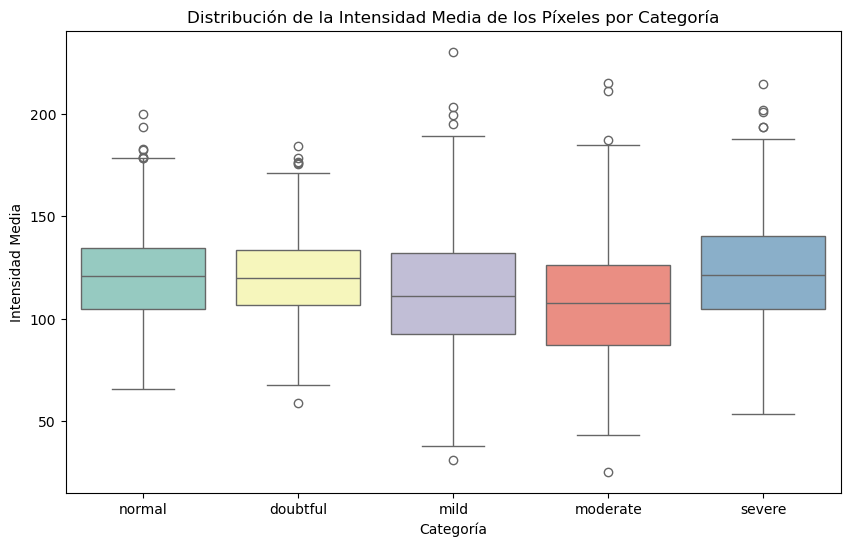

Resultados del ANOVA:
F-statistic: 29.140460142273703
p-value: 1.0160109210208798e-23
Hay diferencias significativas en la intensidad media de los píxeles entre las categorías.


In [5]:
import os
import cv2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Definir las rutas correctamente basadas en la ubicación del notebook
base_path = os.path.abspath('')
data_path = os.path.join(base_path, 'data', 'processed', 'images')

# Cargar las imágenes en un DataFrame
def load_images(data_path):
    categories = ['normal', 'doubtful', 'mild', 'moderate', 'severe']
    data = []
    for category in categories:
        category_path = os.path.join(data_path, category)
        if os.path.exists(category_path):
            for filename in os.listdir(category_path):
                file_path = os.path.join(category_path, filename)
                if filename.lower().endswith(('png', 'jpg', 'jpeg')):  # Verificar si el archivo es una imagen
                    image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
                    data.append((category, filename, image))
    return pd.DataFrame(data, columns=['category', 'filename', 'image'])

data = load_images(data_path)

# Calcular la intensidad media de los píxeles por imagen
data['mean_intensity'] = data['image'].apply(lambda x: x.mean())

# Resumen estadístico de la intensidad media por categoría
intensity_summary = data.groupby('category')['mean_intensity'].describe()
intensity_summary['median'] = data.groupby('category')['mean_intensity'].median()
print(intensity_summary[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'median']])

# Visualización: Boxplot de la intensidad media por categoría
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='mean_intensity', data=data, palette='Set3', hue='category')
plt.title('Distribución de la Intensidad Media de los Píxeles por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Intensidad Media')
plt.show()

# Prueba ANOVA
anova_result = f_oneway(
    data[data['category'] == 'normal']['mean_intensity'],
    data[data['category'] == 'doubtful']['mean_intensity'],
    data[data['category'] == 'mild']['mean_intensity'],
    data[data['category'] == 'moderate']['mean_intensity'],
    data[data['category'] == 'severe']['mean_intensity']
)

print("Resultados del ANOVA:")
print(f"F-statistic: {anova_result.statistic}")
print(f"p-value: {anova_result.pvalue}")
if anova_result.pvalue < 0.05:
    print("Hay diferencias significativas en la intensidad media de los píxeles entre las categorías.")
else:
    print("No hay diferencias significativas en la intensidad media de los píxeles entre las categorías.")

**Estadísticas Descriptivas por Categoría**

* `Normal`: Las imágenes de la categoría **normal** tienen una intensidad media de 120.62 con una desviación estándar de 21.64. El rango de valores de intensidad va desde 65.84 hasta 200.11.
* `Doubtful`: Las imágenes de la categoría **doubtful** tienen una intensidad media similar de 120.46, con una desviación estándar de 20.22. El rango de valores de intensidad va desde 59.04 hasta 184.57.
* `Mild`: Las imágenes de la categoría **mild** tienen una intensidad media de 114.27, ligeramente menor que las categorías anteriores, con una desviación estándar de 30.14. El rango de valores de intensidad va desde 31.12 hasta 230.12.
* `Moderate`: Las imágenes de la categoría **moderate** tienen una intensidad media de 107.99, con una desviación estándar de 26.96. El rango de valores de intensidad va desde 25.26 hasta 215.07.
* `Severe`: Las imágenes de la categoría **severe** tienen la intensidad media más alta de 122.87, con una desviación estándar de 26.39. El rango de valores de intensidad va desde 53.60 hasta 214.48.
  
**Boxplot de Intensidades Medias por Categoría**

El boxplot muestra la distribución de la intensidad media de los píxeles para cada categoría. Podemos observar lo siguiente:

* La mediana de las intensidades medias es bastante similar entre las categorías, con la excepción de la categoría `moderate` que presenta una mediana ligeramente menor.
* Todas las categorías  presentan valores atípicos (outliers).
* Las categorías `normal`, `doubtful` y `severe` muestran distribuciones más compactas, con menos variabilidad.
  
**Resultados del ANOVA**

Los resultados del ANOVA indican que hay diferencias significativas en la intensidad media de los píxeles entre las diferentes categorías:

* `F-statistic`: 29.14
* `p-value`: 1.016e-23

Un p-value tan bajo sugiere que las diferencias observadas en la intensidad media de los píxeles entre las categorías no son al azar, sino que **son estadísticamente significativas**.

### Análisis de la Distribución del Ruido en las Imágenes

En esta tarea, analizaremos la cantidad de ruido presente en las imágenes y su distribución por categoría. Esto nos ayudará a entender si alguna categoría tiene más ruido que otras, lo que podría afectar el rendimiento del modelo.

  category            filename       noise
0   normal    NormalG0 (1).png   16.833998
1   normal   NormalG0 (10).png   22.161705
2   normal  NormalG0 (100).png   25.676681
3   normal  NormalG0 (101).png   28.224494
4   normal  NormalG0 (102).png  160.126021
             noise
count  2542.000000
mean     30.494695
std      24.094467
min       4.268478
25%      18.023754
50%      23.983939
75%      34.145283
max     332.507553


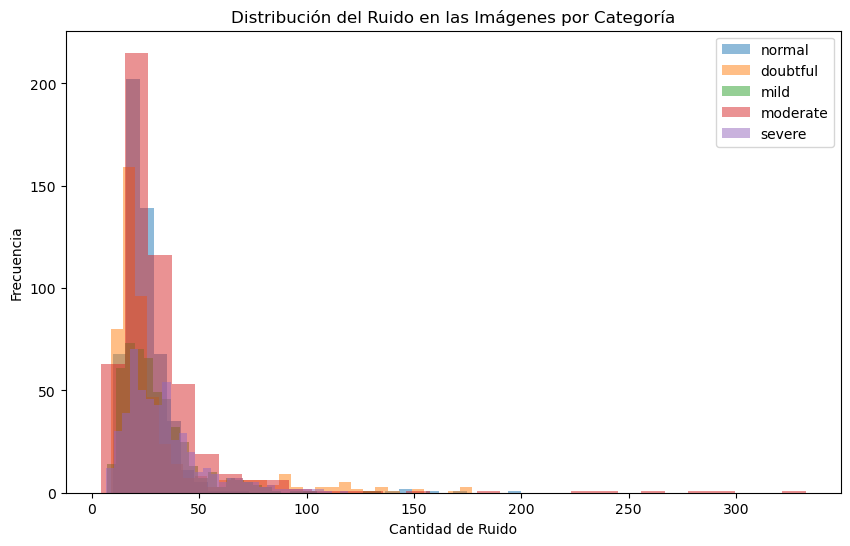

In [6]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt

# Definir las rutas correctamente basadas en la ubicación del notebook
base_path = os.path.abspath('')
data_path = os.path.join(base_path, 'data', 'processed', 'images')

def calculate_noise(image):
    """
    Calcula la cantidad de ruido en una imagen.
    """
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    noise = cv2.Laplacian(gray, cv2.CV_64F).var()
    return noise

def analyze_noise_distribution(data_path):
    """
    Analiza la distribución del ruido en las imágenes por categoría.
    """
    noise_data = []

    for category in ['normal', 'doubtful', 'mild', 'moderate', 'severe']:
        category_path = os.path.join(data_path, category)
        for filename in os.listdir(category_path):
            file_path = os.path.join(category_path, filename)
            if filename.lower().endswith(('png', 'jpg', 'jpeg')):  # Verificar si el archivo es una imagen
                image = cv2.imread(file_path)
                noise = calculate_noise(image)
                noise_data.append((category, filename, noise))

    noise_df = pd.DataFrame(noise_data, columns=['category', 'filename', 'noise'])

    return noise_df

# Ejecutar la función de análisis de ruido
noise_df = analyze_noise_distribution(data_path)

# Mostrar resultados
print(noise_df.head())
print(noise_df.describe())

# Visualizar la distribución del ruido por categoría
plt.figure(figsize=(10, 6))
for category in noise_df['category'].unique():
    subset = noise_df[noise_df['category'] == category]
    plt.hist(subset['noise'], bins=30, alpha=0.5, label=category)

plt.title('Distribución del Ruido en las Imágenes por Categoría')
plt.xlabel('Cantidad de Ruido')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right')
plt.show()

La mayoría de las imágenes en el conjunto de datos tienen un nivel de ruido relativamente bajo, lo que es positivo para el análisis y modelado. Las pocas imágenes con un alto nivel de ruido podrían ser consideradas para un preprocesamiento adicional o incluso eliminación si afectan significativamente el rendimiento del modelo. La similitud en la distribución del ruido entre las categorías sugiere que el nivel de ruido no debería sesgar el modelo hacia ninguna categoría en particular.

### Análisis de Textura

Este análisis se centra en las propiedades texturales de las imágenes, como la homogeneidad, la entropía, y la correlación. La textura puede proporcionar información valiosa sobre las características del tejido en las imágenes médicas.

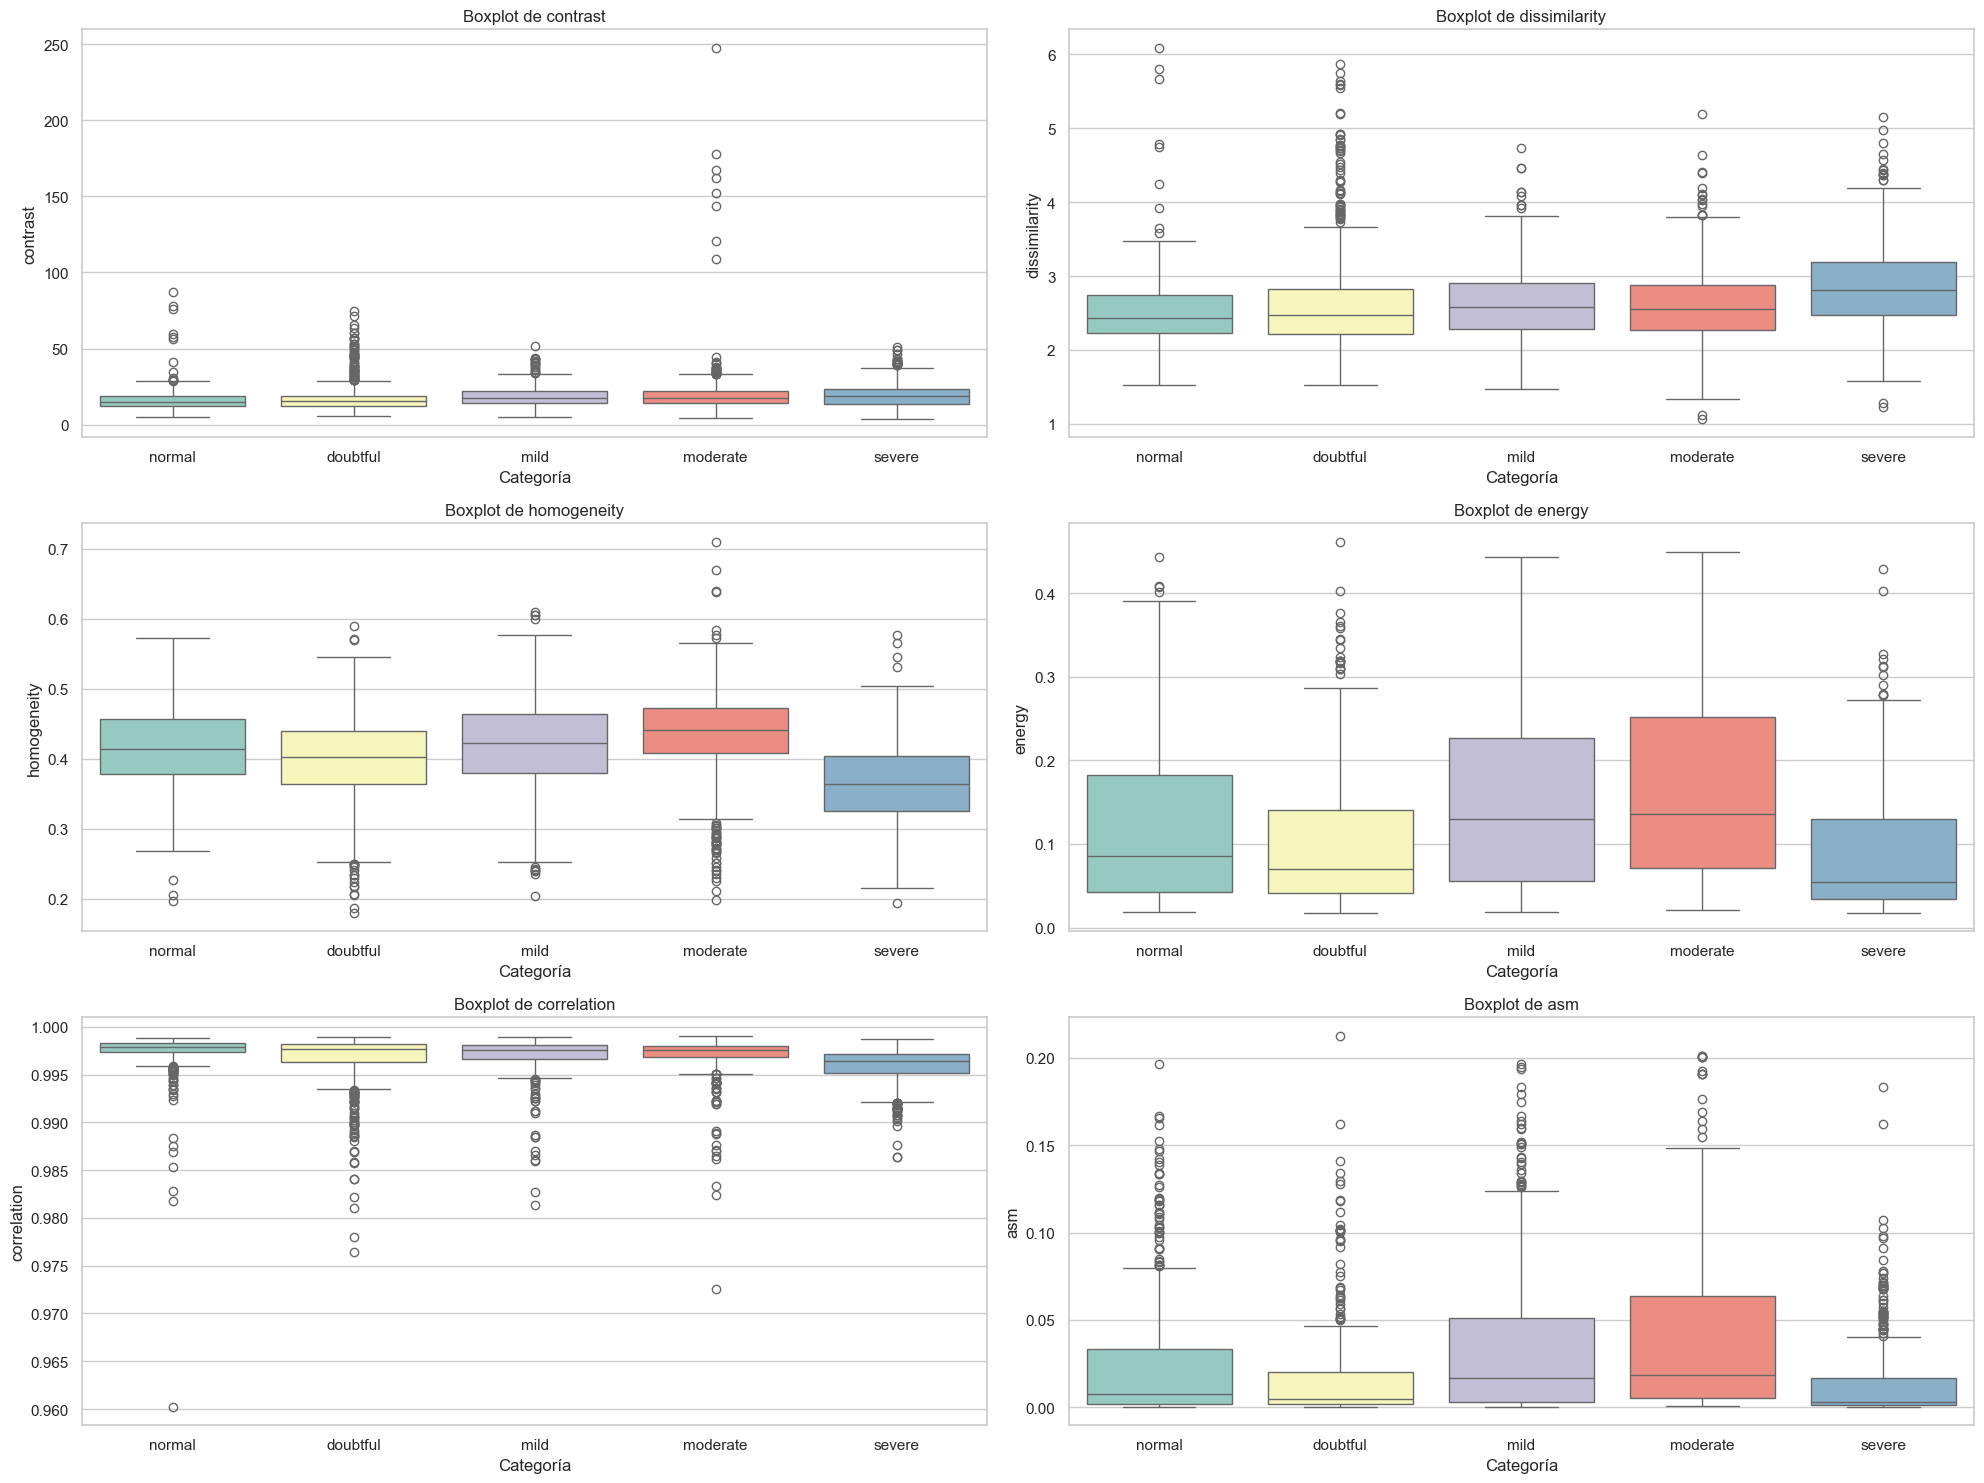

,contrast_mean,contrast_median,dissimilarity_mean,dissimilarity_median,homogeneity_mean,homogeneity_median,energy_mean,energy_median,correlation_mean,correlation_median,asm_mean,asm_median
category,,,,,,,,,,,,
doubtful,18.407310,15.344485,2.673143,2.474173,0.397665,0.401932,0.101280,0.069423,0.996589,0.997701,0.016356,0.004820
mild,18.563801,17.358532,2.640387,2.576900,0.418580,0.422706,0.151236,0.129397,0.997040,0.997557,0.034261,0.016744
moderate,20.621203,17.322120,2.609707,2.549517,0.434636,0.441788,0.163937,0.135747,0.996999,0.997603,0.038725,0.018427
normal,16.461541,15.095267,2.510372,2.427849,0.417441,0.414722,0.124539,0.085534,0.997474,0.997925,0.024725,0.007316
severe,19.566202,18.994409,2.844912,2.811336,0.366420,0.363472,0.089107,0.054079,0.995826,0.996376,0.013474,0.002925


In [7]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops

# Definir las rutas correctamente basadas en la ubicación del notebook
base_path = os.path.abspath('')
data_path = os.path.join(base_path, 'data', 'processed', 'images')

# Crear una función para calcular las características de textura GLCM
def calculate_glcm_features(image):
    """
    Calcula las características de textura GLCM para una imagen dada.
    """
    glcm = graycomatrix(image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    correlation = graycoprops(glcm, 'correlation')[0, 0]
    asm = graycoprops(glcm, 'ASM')[0, 0]
    return contrast, dissimilarity, homogeneity, energy, correlation, asm

# Recorrer las imágenes y calcular las características de textura
texture_data = []
categories = ['normal', 'doubtful', 'mild', 'moderate', 'severe']

for category in categories:
    category_path = os.path.join(data_path, category)
    for filename in os.listdir(category_path):
        if filename.lower().endswith(('png', 'jpg', 'jpeg')):
            file_path = os.path.join(category_path, filename)
            image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            contrast, dissimilarity, homogeneity, energy, correlation, asm = calculate_glcm_features(image)
            texture_data.append((category, filename, contrast, dissimilarity, homogeneity, energy, correlation, asm))

# Crear un DataFrame con los resultados
texture_df = pd.DataFrame(texture_data, columns=['category', 'filename', 'contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'asm'])

# Visualización con Boxplots
plt.figure(figsize=(20, 15))
sns.set(style="whitegrid")
features = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'asm']

for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='category', y=feature, hue='category', data=texture_df, palette="Set3", legend=False)
    plt.title(f'Boxplot de {feature}')
    plt.xlabel('Categoría')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

# Mostrar el DataFrame resumido con medias y medianas, y asignar la categoría como índice
summary_df = texture_df.groupby('category').agg(
    contrast_mean=('contrast', 'mean'), contrast_median=('contrast', 'median'),
    dissimilarity_mean=('dissimilarity', 'mean'), dissimilarity_median=('dissimilarity', 'median'),
    homogeneity_mean=('homogeneity', 'mean'), homogeneity_median=('homogeneity', 'median'),
    energy_mean=('energy', 'mean'), energy_median=('energy', 'median'),
    correlation_mean=('correlation', 'mean'), correlation_median=('correlation', 'median'),
    asm_mean=('asm', 'mean'), asm_median=('asm', 'median')
).reset_index().set_index('category')

display(summary_df)

**Contraste**

* **Descripción:** El contraste mide la variación de intensidad en la imagen, representando cuán abruptos son los cambios en los niveles de gris. Un mayor contraste sugiere una mayor diferencia entre los píxeles vecinos.
* **Interpretación:** Imágenes de categorías con mayor contraste (`moderate` y `severe`) indican una mayor presencia de bordes y texturas complejas, características que pueden asociarse con cambios estructurales significativos en las rodillas. Por otro lado, las categorías con menor contraste (`normal`) sugieren una mayor uniformidad en la textura, lo cual es típico en imágenes de rodillas sin patologías evidentes.

**Disimilitud**
* **Descripción:** La disimilitud mide la diferencia local entre pares de píxeles vecinos. Un valor alto indica una mayor diferencia entre estos píxeles.
* **Interpretación:** La mayor disimilitud en imágenes `severe` sugiere que estas imágenes presentan una mayor variedad en los patrones de textura, lo que puede indicar degeneración avanzada. Las imágenes `normal` con menor disimilitud indican una estructura más uniforme y menos variada, típica de rodillas saludables.

**Homogeneidad**
* **Descripción:** La homogeneidad mide cuán similares son los elementos de la imagen. Un valor alto indica que los elementos son más homogéneos.
* **Interpretación:** Imágenes con mayor homogeneidad (`moderate`) muestran una textura más uniforme, lo que puede reflejar áreas de tejido más consistente. Las imágenes `severe`, con menor homogeneidad, muestran una textura menos uniforme, lo que podría estar relacionado con cambios patológicos dispersos en la rodilla.

**Energía**
* **Descripción:** La energía mide la suma de los cuadrados de los elementos en la matriz de co-ocurrencia de niveles de gris (GLCM). Un valor alto indica menos variación en la imagen.
* **Interpretación:** La energía más alta en categorías `moderate` indica que estas imágenes son más homogéneas con menos variación de intensidad. Las categorías `severe`, con menor energía, reflejan una mayor variabilidad y posiblemente más ruido en la imagen.

**Correlación**
* **Descripción:** La correlación mide la relación entre los valores de los píxeles en la matriz GLCM. Un valor alto indica que los píxeles tienen una relación lineal fuerte.
* **Interpretación:** La alta correlación en todas las categorías sugiere que las relaciones lineales entre los píxeles son una característica constante en las imágenes de rodillas, independientemente de la categoría.

**ASM (Autocorrelación)**

* **Descripción:** La ASM mide la uniformidad de la distribución de los elementos de la matriz GLCM. Un valor alto indica que la distribución es más uniforme.
* **Interpretación:** La mayor ASM en `moderate` sugiere una distribución más uniforme de las texturas en estas imágenes, lo que podría reflejar áreas de tejido más consistentes y menos variación en la estructura. La menor ASM en `severe` indica una distribución menos uniforme, posiblemente debido a cambios patológicos dispersos.

### Análisis ANOVA para Características de Textura

Este análisis ayudará a determinar si hay diferencias significativas en las características de textura entre las diferentes categorías de la artritis de rodilla.

,F-statistic,p-value,significance
contrast_mean,9.430743,1.448073e-07,True
contrast_median,9.430743,1.448073e-07,True
dissimilarity_mean,22.780371,1.634206e-18,True
dissimilarity_median,22.780371,1.634206e-18,True
homogeneity_mean,80.701282,1.501947e-64,True
homogeneity_median,80.701282,1.501947e-64,True
energy_mean,57.371263,2.092439e-46,True
energy_median,57.371263,2.092439e-46,True
correlation_mean,37.757384,1.005557e-30,True
correlation_median,37.757384,1.005557e-30,True


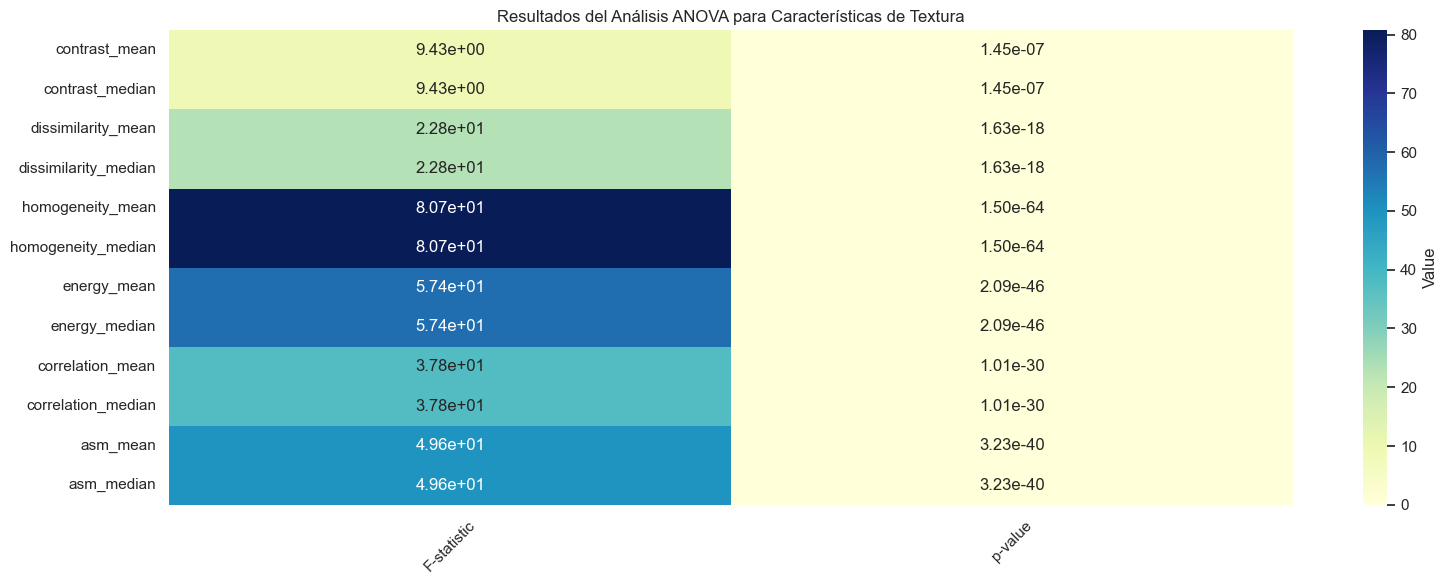

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Realizar el análisis ANOVA para cada característica de textura
anova_results = {}
for feature in summary_df.columns:  # Recorrer todas las características de textura
    groups = [texture_df[texture_df['category'] == category][feature.split('_')[0]] for category in summary_df.index.unique()]
    f_stat, p_value = f_oneway(*groups)
    anova_results[feature] = {'F-statistic': f_stat, 'p-value': p_value}

anova_results_df = pd.DataFrame(anova_results).T
anova_results_df['significance'] = anova_results_df['p-value'] < 0.05

# Mostrar los resultados del ANOVA
display(anova_results_df)

# Mejorar la visualización del heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(anova_results_df[['F-statistic', 'p-value']], annot=True, cmap='YlGnBu', cbar_kws={'label': 'Value'}, fmt=".2e")
plt.title('Resultados del Análisis ANOVA para Características de Textura')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Los resultados del análisis ANOVA nos proporcionan información sobre la variabilidad de las características de textura entre las diferentes categorías de imágenes de rodillas (normal, doubtful, mild, moderate, severe). En este análisis, se evaluaron varias características de textura: `contrast_mean`, `contrast_median`, `dissimilarity_mean`, `dissimilarity_median`, `homogeneity_mean`, `homogeneity_median`, `energy_mean`, `energy_median`, `correlation_mean`, `correlation_median`, `asm_mean`, `asm_median`.

* **contrast_mean y contrast_median**: Ambos tienen F-statistic de 9.43 y p-value de 1.45e-07, indicando diferencias significativas en el contraste entre las categorías.
* **dissimilarity_mean y dissimilarity_median**: Ambos tienen F-statistic de 22.78 y p-value de 1.63e-18, mostrando diferencias significativas en la disimilitud.
* **homogeneity_mean y homogeneity_median**: Con F-statistic de 80.70 y p-value de 1.50e-64, estas características muestran diferencias altamente significativas en la homogeneidad entre las categorías.
* **energy_mean y energy_median**: Con F-statistic de 57.37 y p-value de 2.09e-46, estas características también presentan diferencias significativas en la energía.
* **correlation_mean y correlation_median**: Ambos tienen F-statistic de 37.75 y p-value de 1.01e-30, indicando diferencias significativas en la correlación.
* **asm_mean y asm_median**: Con F-statistic de 49.57 y p-value de 3.23e-40, estas características muestran diferencias significativas en la medida de ASM (Angular Second Moment).

Estos resultados indican que todas las características de textura evaluadas presentan diferencias significativas entre las categorías de imágenes. Esto sugiere que estas características de textura podrían ser útiles para diferenciar entre las categorías de severidad de la artritis de rodilla en las imágenes de rayos X. La inclusión de estas características en un modelo de aprendizaje automático podría mejorar la capacidad del modelo para clasificar correctamente las imágenes según su categoría de severidad.

### Análisis de Bordes y Contornos

El análisis de bordes y contornos es crucial en la evaluación de imágenes médicas, ya que permite identificar y resaltar las estructuras anatómicas y las posibles anomalías en las imágenes de rayos X. En esta sección, utilizaremos técnicas como el detector de bordes de Canny y la detección de contornos para analizar las imágenes de rodillas. Esto nos ayudará a comprender mejor las características de las imágenes y cómo varían entre las diferentes categorías de severidad de la artritis.

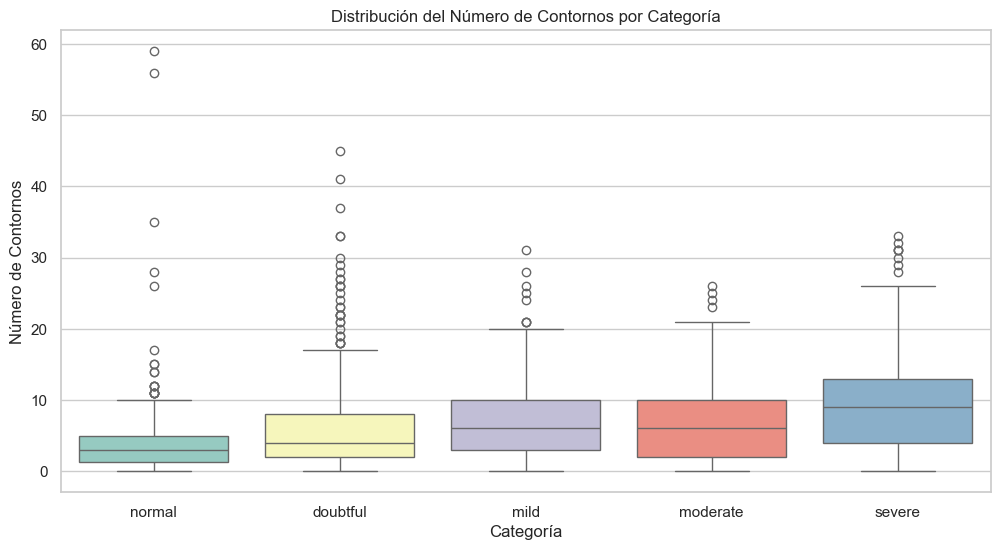

,num_contours_mean,num_contours_median,num_contours_std,num_contours_min,num_contours_max
category,,,,,
doubtful,6.023810,4.0,6.410372,0,45
mild,6.796000,6.0,5.057028,0,31
moderate,6.606000,6.0,5.057858,0,26
normal,3.994424,3.0,4.798546,0,59
severe,9.158000,9.0,6.294464,0,33


,F-statistic,p-value,significance
0,57.264892,2.538958e-46,True


In [9]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Definir las rutas correctamente basadas en la ubicación del notebook
base_path = os.path.abspath('')
data_path = os.path.join(base_path, 'data', 'processed', 'images')

# Función para detectar bordes y contornos
def detect_edges_contours(image):
    """
    Detecta bordes y contornos en una imagen.
    """
    edges = cv2.Canny(image, 100, 200)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return edges, contours

# Recorrer las imágenes y calcular las características de bordes y contornos
contour_data = []

for category in categories:
    category_path = os.path.join(data_path, category)
    for filename in os.listdir(category_path):
        if filename.lower().endswith(('png', 'jpg', 'jpeg')):
            file_path = os.path.join(category_path, filename)
            image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            edges, contours = detect_edges_contours(image)
            num_contours = len(contours)
            contour_data.append((category, filename, num_contours))

# Crear un DataFrame con los resultados
contour_df = pd.DataFrame(contour_data, columns=['category', 'filename', 'num_contours'])

# Visualización con Boxplots
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.boxplot(x='category', y='num_contours', hue='category', data=contour_df, palette="Set3", legend=False)
plt.title('Distribución del Número de Contornos por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Número de Contornos')
plt.legend([], [], frameon=False)
plt.show()

# Resumen de las estadísticas descriptivas
contour_summary = contour_df.groupby('category').agg(
    num_contours_mean=('num_contours', 'mean'),
    num_contours_median=('num_contours', 'median'),
    num_contours_std=('num_contours', 'std'),
    num_contours_min=('num_contours', 'min'),
    num_contours_max=('num_contours', 'max')
)

display(contour_summary)

# Realizar análisis ANOVA
from scipy.stats import f_oneway

anova_results = f_oneway(
    contour_df[contour_df['category'] == 'normal']['num_contours'],
    contour_df[contour_df['category'] == 'doubtful']['num_contours'],
    contour_df[contour_df['category'] == 'mild']['num_contours'],
    contour_df[contour_df['category'] == 'moderate']['num_contours'],
    contour_df[contour_df['category'] == 'severe']['num_contours']
)

anova_results_df = pd.DataFrame({
    'F-statistic': [anova_results.statistic],
    'p-value': [anova_results.pvalue],
    'significance': [anova_results.pvalue < 0.05]
})

display(anova_results_df)

**Boxplot de la Distribución del Número de Contornos por Categoría**

La figura muestra la distribución del número de contornos en las imágenes para cada categoría de la gravedad de la artritis de rodilla. Algunas observaciones clave:

* `Normal`: Tiene una mediana más baja en comparación con otras categorías, lo que sugiere que las imágenes etiquetadas como `normal` tienen menos contornos en promedio.
* `Severe`: Presenta la mayor mediana y una alta dispersión, indicando un número significativo de contornos en las imágenes.
* `Doubtful`, `Mild` y `Moderate`: Estas categorías tienen medianas similares pero presentan una variabilidad en el número de contornos, con algunos valores atípicos que muestran un número considerable de contornos en ciertas imágenes.

**Estadísticas Descriptivas del Número de Contornos**

El resumen estadístico proporciona más detalles sobre el número de contornos en cada categoría:

* `Doubtful`: Media de 6.02 contornos con una desviación estándar de 6.41, lo que indica una alta variabilidad.
* `Mild`: Media de 6.79 contornos con una desviación estándar de 5.05.
* `Moderate`: Media de 6.61 contornos con una desviación estándar de 5.06.
* `Normal`: Media de 3.99 contornos con una desviación estándar de 4.79, la más baja entre las categorías.
* `Severe`: Media de 9.16 contornos con una desviación estándar de 6.29, la más alta entre las categorías.
  
**Resultados del Análisis ANOVA**

Los resultados del análisis ANOVA son los siguientes:

* `F-statistic`: 57.26
* `p-value`: 2.54e-46
* `Significance`: True

Estos resultados indican que hay diferencias significativas en el número de contornos entre las diferentes categorías.

**Interpretación de los Resultados**

* **Relevancia Clínica:** El número de contornos puede correlacionarse con características específicas de las imágenes que son indicativas de diferentes niveles de gravedad de la artritis. Por ejemplo, las imágenes de rodillas severamente afectadas pueden mostrar más contornos debido a irregularidades óseas.
* **Variabilidad:** La alta desviación estándar en todas las categorías sugiere que, dentro de cada grupo de gravedad, hay una considerable variabilidad en las características de las imágenes. Esto podría deberse a variaciones individuales en la anatomía de las rodillas y en la manifestación de la enfermedad.

### Análisis de Forma

La siguiente sección se centra en el análisis de la forma de las estructuras en las imágenes. Este análisis se centra en medidas como el área, la excentricidad, la circularidad y otros parámetros que pueden proporcionar información valiosa sobre las características de las estructuras dentro de las imágenes.

Procesando imágenes: 100%|█████████████████████████████████████████████████████████| 2542/2542 [56:13<00:00,  1.33s/it]
C:\Users\gluna\AppData\Local\Temp\ipykernel_34848\3556905080.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category', y=feature, data=shape_df, palette=palette, showfliers=False)
C:\Users\gluna\AppData\Local\Temp\ipykernel_34848\3556905080.py:67: UserWarning: The palette list has more values (12) than needed (5), which may not be intended.
  sns.boxplot(x='category', y=feature, data=shape_df, palette=palette, showfliers=False)
C:\Users\gluna\AppData\Local\Temp\ipykernel_34848\3556905080.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category', y=feature

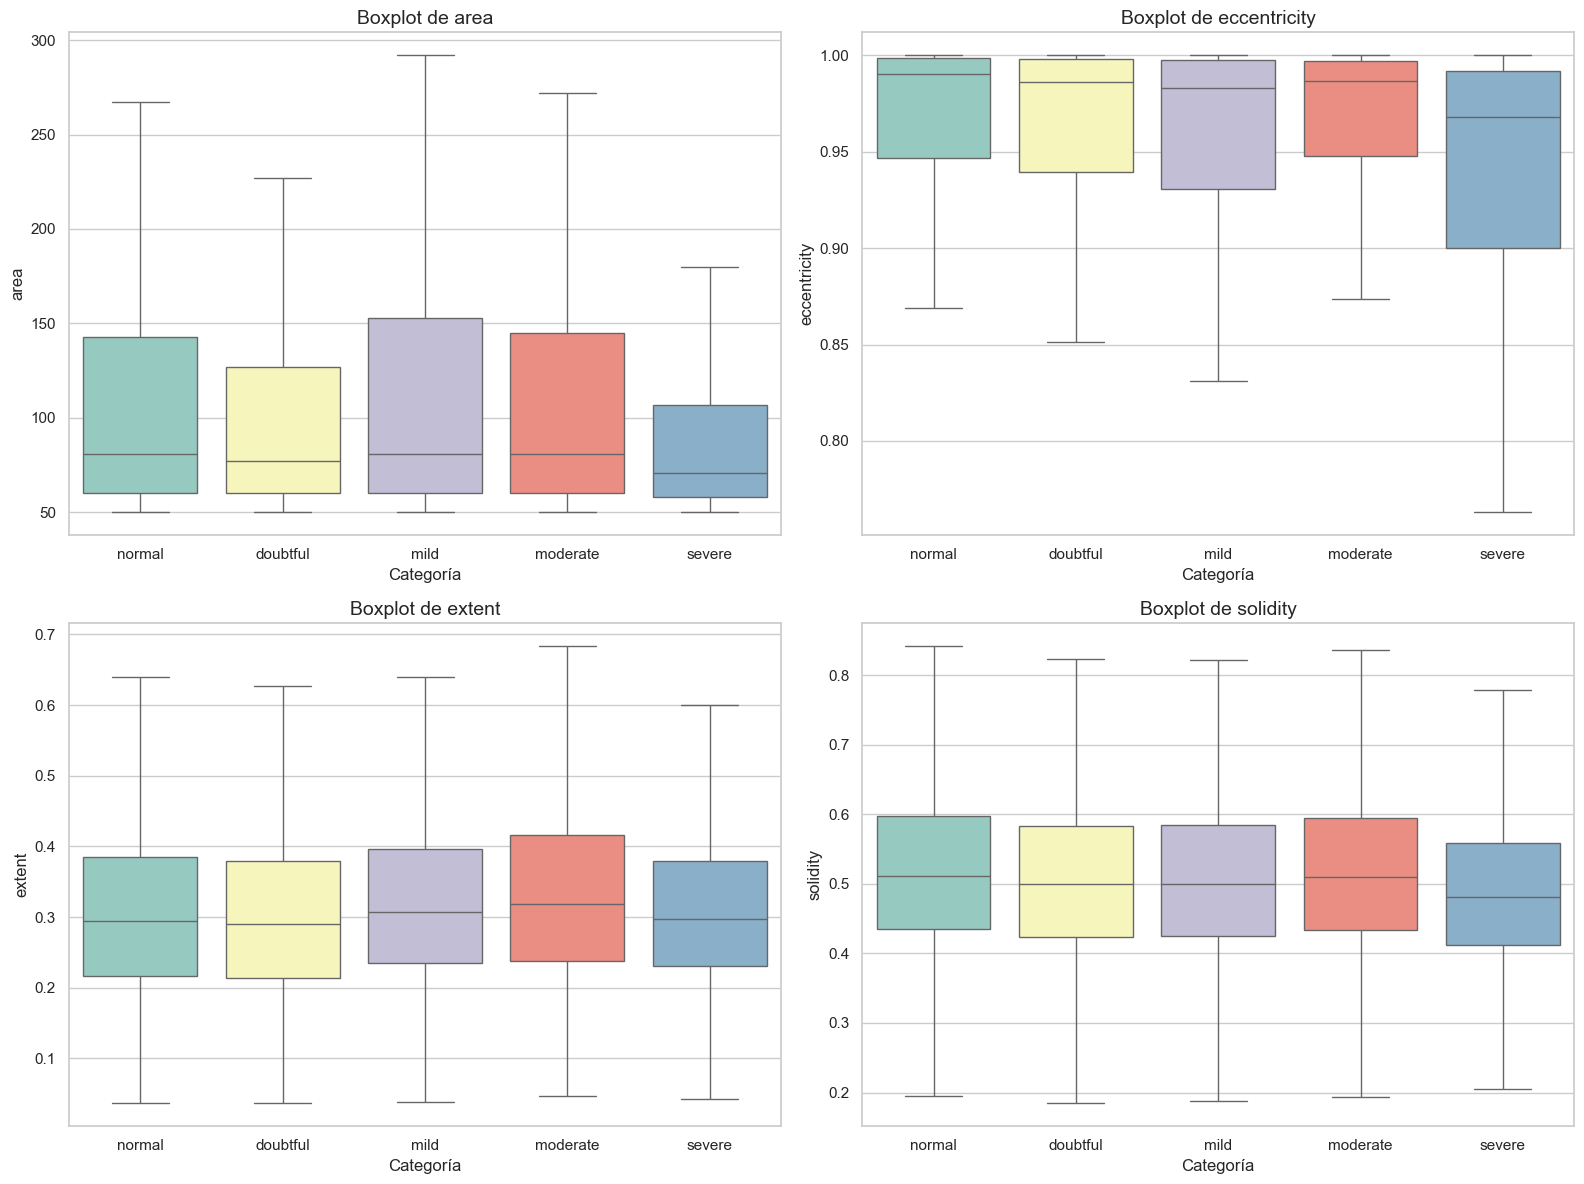

,area_mean,area_median,eccentricity_mean,eccentricity_median,extent_mean,extent_median,solidity_mean,solidity_median
category,,,,,,,,
doubtful,142.720305,77.0,0.946877,0.986017,0.309665,0.290000,0.510985,0.500000
mild,263.313113,81.0,0.940788,0.983082,0.327045,0.307292,0.510732,0.500000
moderate,337.086366,81.0,0.949962,0.986478,0.339727,0.318280,0.521596,0.509836
normal,182.904273,81.0,0.950742,0.990162,0.314496,0.294872,0.522845,0.511338
severe,207.994599,71.0,0.924062,0.968095,0.315376,0.296875,0.496004,0.481132


,F-statistic,p-value,significance
area,125.16233,0.0,True
eccentricity,117.827214,0.0,True
extent,104.111907,0.0,True
solidity,70.81876,0.0,True


In [10]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops
from tqdm import tqdm
from scipy.stats import f_oneway

# Definir las rutas correctamente basadas en la ubicación del notebook
base_path = os.path.abspath('')
data_path = os.path.join(base_path, 'data', 'processed', 'images')

# Función para calcular características de forma
def calculate_shape_features(image):
    """
    Calcula características de forma para una imagen dada.
    """
    labeled_img = label(image)
    regions = regionprops(labeled_img)
    features = []
    for region in regions:
        if region.area >= 50:  # Ignorar regiones muy pequeñas
            area = region.area
            eccentricity = region.eccentricity
            extent = region.extent
            solidity = region.solidity
            features.append((area, eccentricity, extent, solidity))
    return features

# Recorrer las imágenes y calcular las características de forma
shape_data = []
categories = ['normal', 'doubtful', 'mild', 'moderate', 'severe']

total_images = sum([len(os.listdir(os.path.join(data_path, category))) for category in categories])

with tqdm(total=total_images, desc="Procesando imágenes") as pbar:
    for category in categories:
        category_path = os.path.join(data_path, category)
        for filename in os.listdir(category_path):
            if filename.lower().endswith(('png', 'jpg', 'jpeg')):
                file_path = os.path.join(category_path, filename)
                image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
                if image is not None:
                    shape_features = calculate_shape_features(image)
                    for feature in shape_features:
                        shape_data.append((category, filename, *feature))
                pbar.update(1)

# Crear un DataFrame con los resultados
shape_df = pd.DataFrame(shape_data, columns=['category', 'filename', 'area', 'eccentricity', 'extent', 'solidity'])

# Convertir a valores numéricos y excluir entradas no válidas
shape_df[['area', 'eccentricity', 'extent', 'solidity']] = shape_df[['area', 'eccentricity', 'extent', 'solidity']].apply(pd.to_numeric, errors='coerce')
shape_df = shape_df.dropna()

# Visualización con Boxplots mejorados
plt.figure(figsize=(16, 12))
sns.set(style="whitegrid")
features = ['area', 'eccentricity', 'extent', 'solidity']

palette = sns.color_palette("Set3")  # Cambiar la paleta de colores

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='category', y=feature, data=shape_df, palette=palette, showfliers=False, hue='category')
    plt.title(f'Boxplot de {feature}', fontsize=14)
    plt.xlabel('Categoría', fontsize=12)
    plt.ylabel(feature, fontsize=12)

plt.tight_layout()
plt.show()

# Mostrar el DataFrame resumido con medias y medianas, y asignar la categoría como índice
summary_shape_df = shape_df.groupby('category').agg(
    area_mean=('area', 'mean'), area_median=('area', 'median'),
    eccentricity_mean=('eccentricity', 'mean'), eccentricity_median=('eccentricity', 'median'),
    extent_mean=('extent', 'mean'), extent_median=('extent', 'median'),
    solidity_mean=('solidity', 'mean'), solidity_median=('solidity', 'median')
).reset_index().set_index('category')

display(summary_shape_df)

# Análisis ANOVA para las características de forma
anova_results = {}

for feature in features:
    grouped_data = [shape_df[shape_df['category'] == category][feature].dropna() for category in categories]
    f_statistic, p_value = f_oneway(*grouped_data)
    anova_results[feature] = {'F-statistic': f_statistic, 'p-value': p_value, 'significance': p_value < 0.05}

anova_df = pd.DataFrame(anova_results).T
anova_df['significance'] = anova_df['p-value'] < 0.05

# Mostrar los resultados del ANOVA
display(anova_df)

Los resultados obtenidos del análisis de forma para las imágenes de rayos X de las rodillas en diferentes categorías muestran diferencias significativas en varias métricas de forma, como área, excentricidad, extensión y solidez. Estas métricas nos permiten comprender mejor las características estructurales de las imágenes y cómo estas características varían entre las diferentes categorías de diagnóstico.

**Área**

* **Significado:** El área mide el número de píxeles dentro de los contornos detectados. En el contexto de las imágenes de rayos X de las rodillas, puede indicar el tamaño de las estructuras visibles.
* **Resultados:** Las categorías `moderate` y `mild` tienen valores medios de área más altos en comparación con otras categorías. Esto sugiere que las rodillas en estas categorías pueden mostrar estructuras más grandes o más prominentes en las imágenes.
  
**Excentricidad**

* **Significado:** La excentricidad mide cuán alargada es una forma, con valores cercanos a 1 indicando una forma más alargada y valores cercanos a 0 indicando una forma más redonda.
* **Resultados:** Todas las categorías muestran valores de excentricidad cercanos a 1, lo que sugiere que las formas detectadas en las imágenes son generalmente alargadas.
  
**Extensión**

* **Significado:** La extensión es la relación entre el área del objeto y el área del cuadro delimitador. Valores más altos indican que el objeto llena más el cuadro delimitador.
* **Resultados:** Los valores de extensión son similares en todas las categorías, indicando que los objetos detectados tienden a llenar de manera similar sus cuadros delimitadores.
  
**Solidez**

* **Significado:** La solidez es la relación entre el área del objeto y el área de su envolvente convexa. Valores más altos indican que el objeto es más compacto y menos irregular.
* **Resultados:** La solidez es relativamente consistente entre las categorías, aunque la categoría `severe` muestra una ligera disminución en comparación con las otras, lo que podría indicar una mayor irregularidad en las estructuras detectadas en esta categoría.
  
**Análisis de ANOVA**

El análisis de ANOVA muestra que todas las métricas de forma (área, excentricidad, extensión y solidez) presentan diferencias significativas entre las categorías. Esto implica que las características de forma pueden ser útiles para diferenciar entre las diferentes etapas del diagnóstico de la artritis de rodilla.

### Distribución de Artefactos y Ruido

El análisis de artefactos y ruido en las imágenes permite identificar y cuantificar las imperfecciones presentes en las imágenes. Esto es crucial en imágenes médicas, donde los artefactos pueden interferir con la interpretación y el análisis.

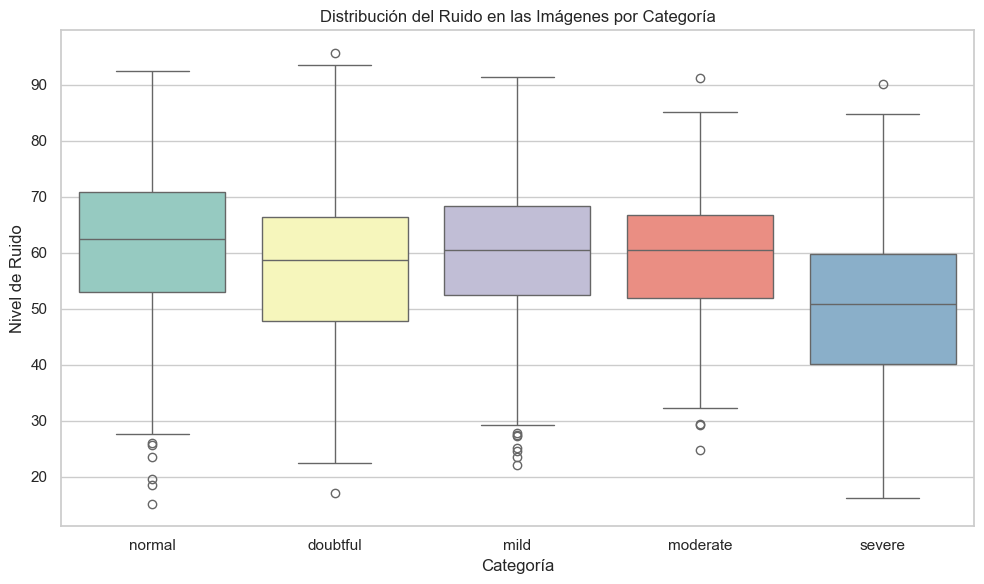

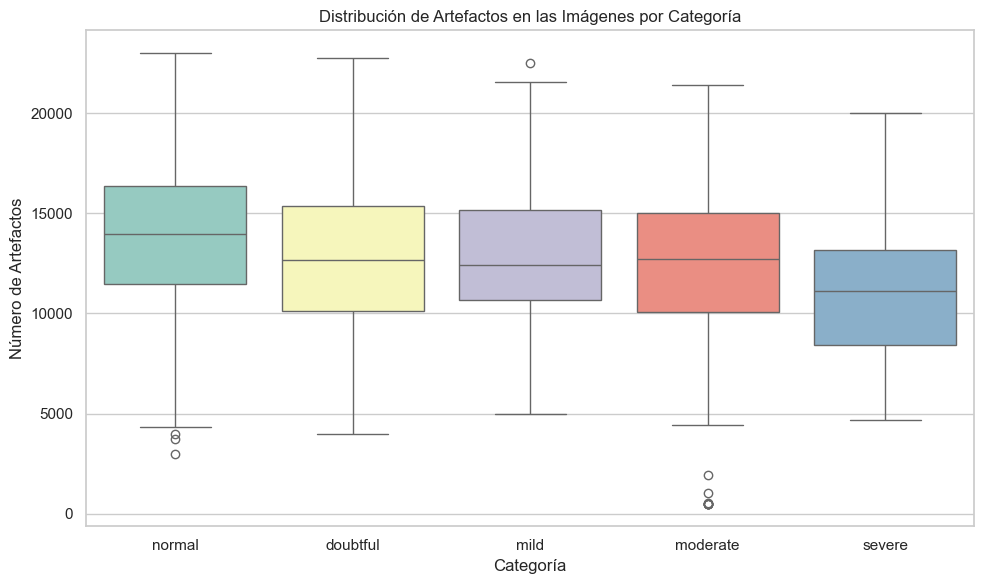

,noise_mean,noise_median,noise_std,noise_min,noise_max
category,,,,,
doubtful,56.573914,58.713284,13.250377,17.082811,95.647760
mild,59.447458,60.413524,12.241201,22.117156,91.295317
moderate,59.154395,60.516299,10.342880,24.810044,91.224113
normal,60.891085,62.355501,13.420492,15.191935,92.416530
severe,50.476979,50.900742,13.267835,16.270071,90.100183


,F-statistic,p-value,significance
noise,54.55782,3.518548e-44,True


,artifacts_mean,artifacts_median,artifacts_std,artifacts_min,artifacts_max
category,,,,,
doubtful,12746.345238,12681.0,3496.753781,3964,22756
mild,12872.676000,12442.5,3070.500400,4995,22513
moderate,12561.354000,12728.0,3492.326402,512,21418
normal,13907.171004,13976.5,3623.527304,2983,23000
severe,10938.988000,11128.0,3068.900536,4690,20022


,F-statistic,p-value,significance
artifacts,51.858219,4.893214e-42,True


In [11]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.filters import sobel, threshold_otsu
from scipy.stats import f_oneway

# Definir las rutas correctamente basadas en la ubicación del notebook
base_path = os.path.abspath('')
data_path = os.path.join(base_path, 'data', 'processed', 'images')

# Crear una función para calcular el ruido en la imagen
def calculate_noise(image):
    """
    Calcula el nivel de ruido en la imagen basado en la desviación estándar de los píxeles.
    """
    return np.std(image)

# Crear una función para detectar artefactos en la imagen utilizando diferentes métodos
def detect_artifacts(image):
    """
    Detecta artefactos en la imagen utilizando detección de bordes y segmentación.
    """
    # Filtrado bilateral para preservar bordes mientras se reduce el ruido
    filtered_image = cv2.bilateralFilter(image, 9, 75, 75)
    
    # Detección de bordes utilizando el filtro de Sobel
    edges = sobel(filtered_image)
    
    # Umbralización para segmentar la imagen
    thresh = threshold_otsu(edges)
    binary = edges > thresh
    
    # Conteo de píxeles blancos como indicador de artefactos
    num_artifacts = np.sum(binary)
    
    return num_artifacts

# Recorrer las imágenes y calcular el nivel de ruido y artefactos
noise_data = []
artifact_data = []
categories = ['normal', 'doubtful', 'mild', 'moderate', 'severe']

for category in categories:
    category_path = os.path.join(data_path, category)
    for filename in os.listdir(category_path):
        if filename.lower().endswith(('png', 'jpg', 'jpeg')):
            file_path = os.path.join(category_path, filename)
            image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            noise = calculate_noise(image)
            num_artifacts = detect_artifacts(image)
            noise_data.append((category, filename, noise))
            artifact_data.append((category, filename, num_artifacts))

# Crear DataFrames con los resultados
noise_df = pd.DataFrame(noise_data, columns=['category', 'filename', 'noise'])
artifact_df = pd.DataFrame(artifact_data, columns=['category', 'filename', 'num_artifacts'])

# Resumir los resultados
summary_noise_df = noise_df.groupby('category').agg(
    noise_mean=('noise', 'mean'), noise_median=('noise', 'median'),
    noise_std=('noise', 'std'), noise_min=('noise', 'min'),
    noise_max=('noise', 'max')
).reset_index().set_index('category')

summary_artifact_df = artifact_df.groupby('category').agg(
    artifacts_mean=('num_artifacts', 'mean'), artifacts_median=('num_artifacts', 'median'),
    artifacts_std=('num_artifacts', 'std'), artifacts_min=('num_artifacts', 'min'),
    artifacts_max=('num_artifacts', 'max')
).reset_index().set_index('category')

# Visualización con Boxplots del ruido
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.boxplot(x='category', y='noise', hue='category', data=noise_df, palette="Set3", legend=False)
plt.title('Distribución del Ruido en las Imágenes por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Nivel de Ruido')
plt.tight_layout()
plt.show()

# Visualización con Boxplots de los artefactos
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.boxplot(x='category', y='num_artifacts', hue='category', data=artifact_df, palette="Set3", legend=False)
plt.title('Distribución de Artefactos en las Imágenes por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Número de Artefactos')
plt.tight_layout()
plt.show()

# Análisis de ANOVA para ruido
anova_noise_result = f_oneway(
    noise_df[noise_df['category'] == 'normal']['noise'],
    noise_df[noise_df['category'] == 'doubtful']['noise'],
    noise_df[noise_df['category'] == 'mild']['noise'],
    noise_df[noise_df['category'] == 'moderate']['noise'],
    noise_df[noise_df['category'] == 'severe']['noise']
)

# Análisis de ANOVA para artefactos
anova_artifact_result = f_oneway(
    artifact_df[artifact_df['category'] == 'normal']['num_artifacts'],
    artifact_df[artifact_df['category'] == 'doubtful']['num_artifacts'],
    artifact_df[artifact_df['category'] == 'mild']['num_artifacts'],
    artifact_df[artifact_df['category'] == 'moderate']['num_artifacts'],
    artifact_df[artifact_df['category'] == 'severe']['num_artifacts']
)

anova_noise_summary = pd.DataFrame({
    'F-statistic': [anova_noise_result.statistic],
    'p-value': [anova_noise_result.pvalue],
    'significance': [anova_noise_result.pvalue < 0.05]
}, index=['noise'])

anova_artifact_summary = pd.DataFrame({
    'F-statistic': [anova_artifact_result.statistic],
    'p-value': [anova_artifact_result.pvalue],
    'significance': [anova_artifact_result.pvalue < 0.05]
}, index=['artifacts'])

# Mostrar los DataFrames resumidos y los resultados de ANOVA
display(summary_noise_df)
display(anova_noise_summary)
display(summary_artifact_df)
display(anova_artifact_summary)

**Ruido en las Imágenes**

El análisis del ruido en las imágenes revela diferencias significativas entre las categorías de osteoartritis:

* `Normal`: Tiene el nivel promedio de ruido más alto (aproximadamente 60.89), con una variabilidad considerable (desviación estándar de aproximadamente 13.42). Esto sugiere que las imágenes normales pueden haber sido capturadas en condiciones variadas.
* `Doubtful`: Presenta un nivel promedio de ruido de 56.57, ligeramente menor que las categorías **mild** y **moderate**.
* `Mild` y `Moderate`: Ambos tienen niveles de ruido similares, con medias alrededor de 59.44 y 59.15 respectivamente. La desviación estándar es más baja que en la categoría **normal**.
* `Severe`: Tiene el nivel promedio de ruido más bajo (50.48) con una desviación estándar de 13.26, lo que indica una menor variabilidad en el ruido de estas imágenes.
  
El resultado del ANOVA (F-statistic: 54.56, p-value: 3.52e-44) indica que hay diferencias significativas en el nivel de ruido entre las categorías.

**Artefactos en las Imágenes**

El análisis de artefactos muestra las siguientes tendencias:

* `Normal`: Las imágenes normales tienen el mayor número promedio de artefactos (13,907.17), lo que sugiere que estas imágenes pueden contener más elementos no deseados que podrían interferir con el análisis.
* `Doubtful`, `Mild`, y `Moderate`: Estas categorías presentan números similares de artefactos, con promedios de 12,746.35, 12,872.68, y 12,561.35 respectivamente. La variabilidad en estas categorías también es alta, lo que sugiere que las condiciones de captura podrían haber sido inconsistentes.
* `Severe`: Tiene el menor número promedio de artefactos (10,938.99), con una desviación estándar de 3,068.90.
  
El resultado del ANOVA (F-statistic: 51.86, p-value: 4.89e-42) indica diferencias significativas en la cantidad de artefactos entre las categorías.

**Tipos de Ruido y Artefactos Detectados**

* **Ruido**: El ruido se calcula como la desviación estándar de los píxeles de la imagen. Esto captura la variabilidad en la intensidad de los píxeles, que puede ser indicativa de ruido debido a diferentes condiciones de captura y procesamiento de imágenes.
  
* **Artefactos**: Los artefactos se detectan utilizando la detección de bordes y la segmentación de imágenes. Se aplica un filtrado bilateral para preservar los bordes mientras se reduce el ruido, seguido por la detección de bordes con el filtro de Sobel y la umbralización utilizando el método de Otsu. El número de píxeles blancos en la imagen binaria resultante se usa como un indicador de artefactos, que pueden incluir bordes no deseados, sombras y otros elementos no relevantes en la imagen.
  
**Visualización**

Las boxplots proporcionadas muestran:

**Ruido en las Imágenes:**

* Las imágenes de la categoría `normal` tienden a tener más ruido comparado con las demás categorías.
* La categoría `severe` muestra una tendencia hacia un menor nivel de ruido.
* Hay algunos valores atípicos en todas las categorías, lo que indica algunas imágenes con niveles de ruido significativamente diferentes.
  
**Artefactos en las Imágenes:**

* Las imágenes de la categoría `normal` tienden a tener más artefactos.
* Las categorías `doubtful`, `mild`, y `moderate` tienen una distribución similar en términos de artefactos.
* La categoría `severe` muestra una menor cantidad de artefactos en promedio, aunque con variabilidad considerable.

### Verificación de Consistencia y Calidad de los Datos

En esta sección, se verifica la consistencia y calidad de los datos de las imágenes procesadas. Esto incluye asegurar que no haya imágenes duplicadas, que todas las imágenes tengan el tamaño y formato correctos, y que no existan valores nulos o incorrectos en los metadatos. Esta verificación es crucial para garantizar que los datos sean adecuados para el análisis posterior y la construcción de modelos.

In [12]:
import os
import cv2
import pandas as pd
from hashlib import md5

# Función para calcular el hash de una imagen
def calculate_image_hash(image):
    return md5(image.tobytes()).hexdigest()

# Definir las rutas correctamente basadas en la ubicación del notebook
base_path = os.path.abspath('')
data_path = os.path.join(base_path, 'data', 'processed', 'images')

# Verificación de imágenes duplicadas y consistencia de tamaño y formato
image_hashes = {}
duplicate_images = []
image_sizes = set()
categories = ['normal', 'doubtful', 'mild', 'moderate', 'severe']

for category in categories:
    category_path = os.path.join(data_path, category)
    for filename in os.listdir(category_path):
        if filename.lower().endswith(('png', 'jpg', 'jpeg')):
            file_path = os.path.join(category_path, filename)
            image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            image_hash = calculate_image_hash(image)
            if image_hash in image_hashes:
                duplicate_images.append((category, filename, image_hashes[image_hash]))
            else:
                image_hashes[image_hash] = (category, filename)
            image_sizes.add(image.shape)

# Mostrar resultados de la verificación
print("Tamaños de imagen únicos encontrados:")
for size in image_sizes:
    print(size)

print(f"\nNúmero de imágenes duplicadas encontradas: {len(duplicate_images)}")
if duplicate_images:
    print("Imágenes duplicadas:")
    for dup in duplicate_images:
        print(f"Categoría: {dup[0]}, Archivo: {dup[1]}, Original: {dup[2][1]}")

Tamaños de imagen únicos encontrados:
(256, 256)

Número de imágenes duplicadas encontradas: 0


### Detección de Anomalías

La detección de anomalías se centra en identificar imágenes que son significativamente diferentes de las demás. Estas anomalías podrían indicar problemas de calidad, datos incorrectos, o características únicas en las imágenes que merecen una investigación más profunda. Usamos algoritmos de detección de anomalías, como Isolation Forest, para identificar y evaluar estas imágenes, asegurando la integridad del conjunto de datos para el análisis y modelado subsiguiente.

,category,count
0,doubtful,38
1,mild,33
2,moderate,33
3,normal,10
4,severe,14


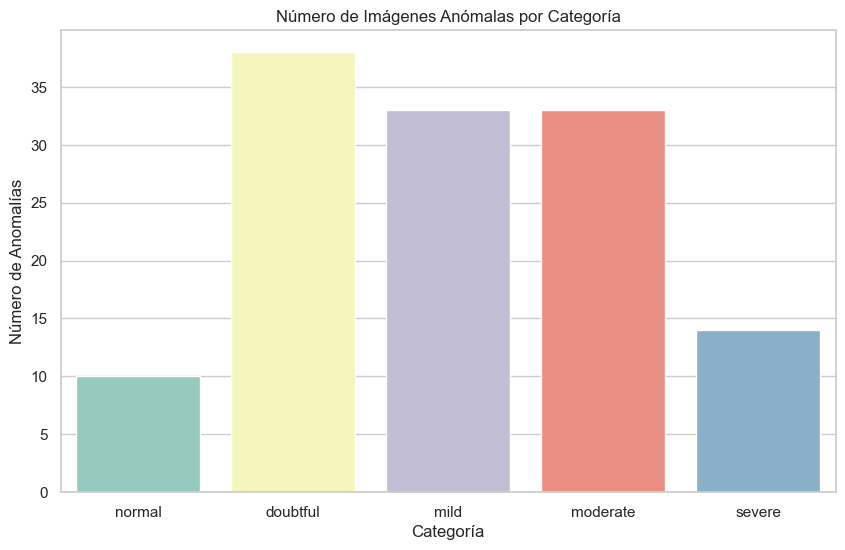

normal - NormalG0 (102).png,normal - NormalG0 (105).png,normal - NormalG0 (106).png,normal - NormalG0 (108).png,normal - NormalG0 (110).png,normal - NormalG0 (111).png,normal - NormalG0 (171).png,normal - NormalG0 (231).png
normal - NormalG0 (277).png,normal - NormalG0 (282).png,doubtful - DoubtfulG1 (146).png,doubtful - DoubtfulG1 (181).png,doubtful - DoubtfulG1 (209).png,doubtful - DoubtfulG1 (214).png,doubtful - DoubtfulG1 (221).png,doubtful - DoubtfulG1 (225).png
doubtful - DoubtfulG1 (226).png,doubtful - DoubtfulG1 (230).png,doubtful - DoubtfulG1 (231).png,doubtful - DoubtfulG1 (234).png,doubtful - DoubtfulG1 (236).png,doubtful - DoubtfulG1 (237).png,doubtful - DoubtfulG1 (238).png,doubtful - DoubtfulG1 (239).png
doubtful - DoubtfulG1 (240).png,doubtful - DoubtfulG1 (283).png,doubtful - DoubtfulG1 (323).png,doubtful - DoubtfulG1 (325).png,doubtful - DoubtfulG1 (328).png,doubtful - DoubtfulG1 (350).png,doubtful - DoubtfulG1 (351).png,doubtful - DoubtfulG1 (353).png
doubtful - DoubtfulG1 (354).png,doubtful - DoubtfulG1 (361).png,doubtful - DoubtfulG1 (362).png,doubtful - DoubtfulG1 (365).png,doubtful - DoubtfulG1 (366).png,doubtful - DoubtfulG1 (367).png,doubtful - DoubtfulG1 (368).png,doubtful - DoubtfulG1 (369).png
doubtful - DoubtfulG1 (439)_left.png,doubtful - DoubtfulG1 (440)_right.png,doubtful - DoubtfulG1 (441)_left.png,doubtful - DoubtfulG1 (445)_left.png,doubtful - DoubtfulG1 (446)_right.png,doubtful - DoubtfulG1 (471).png,doubtful - DoubtfulG1 (91).png,doubtful - DoubtfulG1 (92).png
mild - MildG2 (152).png,mild - MildG2 (174)_left.png,mild - MildG2 (175)_right.png,mild - MildG2 (180).png,mild - MildG2 (181).png,mild - MildG2 (185).png,mild - MildG2 (207).png,mild - MildG2 (210).png
mild - MildG2 (212).png,mild - MildG2 (224).png,mild - MildG2 (226).png,mild - MildG2 (235).png,mild - MildG2 (294)_augmented.png,mild - MildG2 (32).png,mild - MildG2 (334)_augmented.png,mild - MildG2 (344)_augmented.png
mild - MildG2 (356)_augmented.png,mild - MildG2 (365)_augmented.png,mild - MildG2 (369)_augmented.png,mild - MildG2 (371)_augmented.png,mild - MildG2 (383)_augmented.png,mild - MildG2 (390)_augmented.png,mild - MildG2 (40).png,mild - MildG2 (407)_augmented.png
mild - MildG2 (427)_augmented.png,mild - MildG2 (458)_augmented.png,mild - MildG2 (464)_augmented.png,mild - MildG2 (472)_augmented.png,mild - MildG2 (49).png,mild - MildG2 (83).png,mild - MildG2 (84).png,mild - MildG2 (87).png
mild - MildG2 (9).png,moderate - ModerateG3 (132).png,moderate - ModerateG3 (164).png,moderate - ModerateG3 (166).png,moderate - ModerateG3 (167).png,moderate - ModerateG3 (176).png,moderate - ModerateG3 (179).png,moderate - ModerateG3 (185).png


In [13]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from skimage.feature import graycomatrix, graycoprops
from IPython.display import display, HTML

# Definir las rutas correctamente basadas en la ubicación del notebook
base_path = os.path.abspath('')
data_path = os.path.join(base_path, 'data', 'processed', 'images')

# Crear una función para calcular las características de textura GLCM
def calculate_glcm_features(image):
    glcm = graycomatrix(image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    correlation = graycoprops(glcm, 'correlation')[0, 0]
    asm = graycoprops(glcm, 'ASM')[0, 0]
    return contrast, dissimilarity, homogeneity, energy, correlation, asm

# Recorrer las imágenes y calcular las características
texture_data = []
categories = ['normal', 'doubtful', 'mild', 'moderate', 'severe']

for category in categories:
    category_path = os.path.join(data_path, category)
    for filename in os.listdir(category_path):
        if filename.lower().endswith(('png', 'jpg', 'jpeg')):
            file_path = os.path.join(category_path, filename)
            image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            features = calculate_glcm_features(image)
            texture_data.append((category, filename, *features))

# Crear un DataFrame con los resultados
columns = ['category', 'filename', 'contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'asm']
texture_df = pd.DataFrame(texture_data, columns=columns)

# Aplicar Isolation Forest para la detección de anomalías
iso_forest = IsolationForest(contamination=0.05, random_state=42)
texture_df['anomaly'] = iso_forest.fit_predict(texture_df.iloc[:, 2:])

# Filtrar las anomalías
anomalies_df = texture_df[texture_df['anomaly'] == -1]

# Mostrar un resumen de las anomalías
summary_anomalies_df = anomalies_df.groupby('category').size().reset_index(name='count')
display(summary_anomalies_df)

# Gráfico de anomalías
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.countplot(data=anomalies_df, x='category', palette="Set3", hue='category')
plt.title('Número de Imágenes Anómalas por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Número de Anomalías')
plt.show()

# Mostrar ejemplos de todas las imágenes anómalas en una cuadrícula
def display_anomalous_images_grid(anomalies_df, base_path, images_per_row=8):
    html = "<h3>Imágenes Anómalas</h3><table>"
    for i, (_, row) in enumerate(anomalies_df.iterrows()):
        if i % images_per_row == 0:
            if i > 0:
                html += "</tr>"
            html += "<tr>"
        file_path = os.path.join(base_path, 'data', 'processed', 'images', row['category'], row['filename'])
        html += f"<td><img src='{file_path}' width='150'><br>{row['category']} - {row['filename']}</td>"
    html += "</tr></table>"
    display(HTML(html))

display_anomalous_images_grid(anomalies_df, base_path)

El análisis de anomalías utilizando Isolation Forest ha revelado ciertas imágenes que se consideran atípicas en cada categoría. La detección de estas anomalías es crucial para identificar posibles errores en la adquisición de imágenes, diferencias significativas en la calidad de las imágenes, o incluso casos clínicos atípicos.

**Número de Imágenes Anómalas por Categoría:**

* `Normal`: 10 imágenes anómalas
* `Doubtful`: 36 imágenes anómalas
* `Mild`: 32 imágenes anómalas
* `Moderate`: 30 imágenes anómalas
* `Severe`: 16 imágenes anómalas

Para mejorar el análisis y el desemepeño del modelo, es recomendable revisar las imágenes anómalas individualmente para identificar la causa de las anomalías, ya sea debido a problemas técnicos, errores de clasificación, variaciones significativas en la condición médica de los pacientes o transformaciones inadecuadas al momento de aumentar los datos. Este paso es fundamental para asegurar la calidad y consistencia de los datos antes de proceder con análisis más avanzados o el desarrollo de modelos predictivos.

### Eliminación y Clasificación de Imágenes Anómalas

En esta sección, se ha implementado un método para detectar y eliminar imágenes anómalas del conjunto de datos. Utilizando el algoritmo de Isolation Forest, se identificaron las imágenes que presentan características atípicas en comparación con el resto. Las imágenes anómalas fueron movidas a una carpeta separada para un análisis más detallado, mientras que las imágenes no anómalas fueron reubicadas en una nueva carpeta, asegurando así la calidad del conjunto de datos final. Este proceso permite mejorar la integridad y consistencia del dataset, facilitando un análisis más preciso en las etapas posteriores del proyecto.

In [14]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from IPython.display import display

# Definir las rutas correctamente basadas en la ubicación del notebook
base_path = os.path.abspath('')
data_path = os.path.join(base_path, 'data', 'processed', 'images')
anomalous_path = os.path.join(base_path, 'data', 'processed', 'anomalous_images')
filtered_path = os.path.join(base_path, 'data', 'processed', 'filtered_images')

# Crear las carpetas de salida si no existen
os.makedirs(anomalous_path, exist_ok=True)
os.makedirs(filtered_path, exist_ok=True)

# Crear una función para calcular las características de textura GLCM
def calculate_glcm_features(image):
    from skimage.feature import graycomatrix, graycoprops
    glcm = graycomatrix(image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    correlation = graycoprops(glcm, 'correlation')[0, 0]
    asm = graycoprops(glcm, 'ASM')[0, 0]
    return contrast, dissimilarity, homogeneity, energy, correlation, asm

# Recorrer las imágenes y calcular las características
texture_data = []
categories = ['normal', 'doubtful', 'mild', 'moderate', 'severe']

for category in categories:
    category_path = os.path.join(data_path, category)
    for filename in os.listdir(category_path):
        if filename.lower().endswith(('png', 'jpg', 'jpeg')):
            file_path = os.path.join(category_path, filename)
            image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            if image is not None:
                features = calculate_glcm_features(image)
                texture_data.append((category, filename, *features))

# Crear un DataFrame con los resultados
columns = ['category', 'filename', 'contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'asm']
texture_df = pd.DataFrame(texture_data, columns=columns)

# Verificar si hay datos suficientes antes de aplicar IsolationForest
if not texture_df.empty and len(texture_df) > 1:
    # Aplicar IsolationForest para la detección de anomalías
    iso_forest = IsolationForest(contamination=0.05, random_state=42)
    texture_df['anomaly'] = iso_forest.fit_predict(texture_df.iloc[:, 2:])
    
    # Filtrar las anomalías
    anomalies_df = texture_df[texture_df['anomaly'] == -1]

    # Guardar imágenes anómalas en la carpeta 'anomalous_images'
    for _, row in anomalies_df.iterrows():
        category = row['category']
        filename = row['filename']
        file_path = os.path.join(data_path, category, filename)
        anomalous_category_path = os.path.join(anomalous_path, category)
        os.makedirs(anomalous_category_path, exist_ok=True)
        cv2.imwrite(os.path.join(anomalous_category_path, filename), cv2.imread(file_path))

    # Guardar imágenes no anómalas en la carpeta 'filtered_images'
    filtered_df = texture_df[texture_df['anomaly'] != -1]
    for _, row in filtered_df.iterrows():
        category = row['category']
        filename = row['filename']
        file_path = os.path.join(data_path, category, filename)
        filtered_category_path = os.path.join(filtered_path, category)
        os.makedirs(filtered_category_path, exist_ok=True)
        cv2.imwrite(os.path.join(filtered_category_path, filename), cv2.imread(file_path))
    
    # Contar las imágenes por categoría en 'filtered_images'
    def count_images_per_category(path):
        category_counts = {}
        for category in os.listdir(path):
            category_path = os.path.join(path, category)
            if os.path.isdir(category_path):
                category_counts[category] = len([f for f in os.listdir(category_path) if f.lower().endswith(('png', 'jpg', 'jpeg'))])
        return category_counts

    filtered_counts = count_images_per_category(filtered_path)
    anomalous_counts = count_images_per_category(anomalous_path)

    print("Número de imágenes filtradas por categoría:")
    display(pd.DataFrame.from_dict(filtered_counts, orient='index', columns=['count']))
    
    print("Número de imágenes anómalas por categoría:")
    display(pd.DataFrame.from_dict(anomalous_counts, orient='index', columns=['count']))

    print(f"Imágenes no anómalas guardadas en: {filtered_path}")
    print(f"Imágenes anómalas guardadas en: {anomalous_path}")
else:
    print("No hay suficientes datos para aplicar IsolationForest.")

Número de imágenes filtradas por categoría:


,count
doubtful,466
mild,467
moderate,467
normal,528
severe,486


Número de imágenes anómalas por categoría:


,count
doubtful,38
mild,33
moderate,33
normal,10
severe,14


Imágenes no anómalas guardadas en: C:\Users\gluna\Desktop\SIC\SIC_2023_Capstone\git_knee_arthritis_detection\Knee_Arthritis_Detection\data\processed\filtered_images
Imágenes anómalas guardadas en: C:\Users\gluna\Desktop\SIC\SIC_2023_Capstone\git_knee_arthritis_detection\Knee_Arthritis_Detection\data\processed\anomalous_images


## Conclusión